# Example: Profit Diagrams for European/American Options Contracts at Expiration

## Call contracts
A `call` option is a financial contract that gives the holder the right, but not the obligation, to purchase a specified asset, such as stocks, commodities, or currencies, at a predetermined price within a specified time period. Let's consider stock as the underlying asset. A single standard `call` contract controls `100` shares of stock.

The business case for buying (or selling) a `call` contract:
* __Buyer (long)__: From the buyer's perspective, call contracts allow an investor to benefit from the price movement of `XYZ` to the upside _without_ purchasing `XYZ`. Further, call options (again from the buyer's perspective) have _limited downside risk_, i.e., the maximum amount that the holder of the call option can lose is the premium paid for the option. Finally, call options are a mechanism to purchase shares of `XYZ` at the strike price of $K$ instead of the market price of $S$. 
* __Seller (short)__: From the seller's perspective, the main objective of selling a call contract is to collect the premium $\mathcal{P}$. Call contracts also allow the seller to benefit from the price movement of `XYZ` to the downside _without_ purchasing `XYZ`. However, for a seller, call options have _unlimted upside_ risk; thus, call options are often only sold by investors who already own the required number of shares of `XYZ` (known as a [covered call position](https://www.investopedia.com/terms/c/coveredcall.asp)). Finally, call options offer the seller the opportunity to sell shares of `XYZ` at the strike price of $K$ instead of the market price of $S$.

## Put constracts
A `put` option is a financial contract that gives the holder the right, but not the obligation, to sell a specified asset, such as stocks, commodities, or currencies, at a predetermined price within a specified time period. Let's consider stock as the underlying asset. A single standard `put` contract controls `100` shares of stock.

The business case for buying (or selling) `put` contracts:
* __Buyer (long)__: From the buyer's perspective, `put` contracts allow an investor to benefit from the price movement of `XYZ` to the downside _without_ purchasing `XYZ`. Further, `put` options (again from the buyer's perspective) have _limited downside risk_, i.e., the maximum amount that the holder of the `put` option can lose is the premium paid for the option. Finally, `put` contracts are a mechanism to sell shares of `XYZ` at the strike price of $K$ instead of the market price of $S$. 
* __Seller (short)__: From the seller's perspective, the motivation for selling a `put` contract is to collect the premium $\mathcal{P}$. Put contracts also allow the seller to benefit from the price movement of `XYZ` to the upside _without_ purchasing `XYZ`. However, for a seller, `put` options have _unlimted downside_ risk; thus, `put` options are often only sold by investors who have set aside the required capital to purchase the required number of shares of `XYZ` (known as a [cash secured put position](https://www.fidelity.com/learning-center/investment-products/options/know-about-cash-covered-puts)). Finally, `put` options offer the seller the opportunity to buy shares of `XYZ` at the strike price of $K-\mathcal{P}$ instead of the market price of $S$.


In the case of [American](https://www.investopedia.com/terms/a/americanoption.asp) style [call contracts](https://www.investopedia.com/terms/p/putoption.asp), the option buyer can exercise their right at any point between when the contract is purchased and the expiration date. On the other hand, buyers of [European](https://www.investopedia.com/terms/e/europeanoption.asp) style contracts can only exercise their right on the expiration date.

### Learning objective
This example will familiarize students with the construction of option contract models and the computation of payoff/profit diagrams for `call` and `put` contract models at expiration. The payoff for American and European contracts is the same. However, the premium values for the contracts are different. In this example, we use American contract premiums taken from the market.

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our example problem.

In [2]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-5660-Examples-F23`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`


#### Constants

In [69]:
Sₒ = 117.50;
number_of_steps = 101
β = range(0.5,stop=1.5,length = number_of_steps) |> collect;
share_price_array = [Sₒ*β_value for β_value ∈ β];

## Payoff, Profit, Premium and Breakeven for `Call` contracts
The payoff per share of a `call` contract at expiration `T` days in the future $V_{c}(K,S(T))$ is defined as:

$$V_{c}(K,S(T)) = (S-K)^{+} = \max\left(S(T) - K,~0\right)$$

where $K$ denotes the strike price and $S(T)$ represents the share price of the underlying asset `T` days in the future (at expiration). The right (but not the obligation) to buy shares at the strike `K` is not free. The contract `seller` charges the contract `buyer` a premium for each `call` contract $\mathcal{P}_{c}(\dots)$. From the perspective of the `buyer`, the profit per share for the `call` contract $P_{c}$ is the payoff of the contract minus the cost of the contract:

$$P_{c}(K,S(T)) = V_{c}(K,S(T)) -  \mathcal{P}_{c}(K,S(0))$$

Thus, from the buyer’s perspective, the share price must move _above the strike price_ to make up the amount paid for the contract which is called the breakeven price $\mathcal{B}_{c}$:

$$\mathcal{B}_{c} = K + \mathcal{P}_{c}(K,S(0))$$

Finally, the premium (cost) for each `call` contract $\mathcal{P}_{c}(\dots)$ is defined by the expression:

$$\mathcal{P}_{c}(K,S(0))\geq\mathbb{E}\Bigl(\mathcal{D}^{-1}_{T,0}(\bar{r})\cdot{V_{c}}(K,S(T)\Bigr)$$

where $\mathcal{D}_{T,0}(\bar{r})$ denotes the discount rate between the time when the contract was purchased `0` and contract expiration `T` days in the future. Option contracts use risk-neutral pricing; thus, the discount rate $\bar{r}$ is typically taken as the interest rate on 10-year treasury notes. 

### Implementation
Consider a hypothetical call contract for `AMD` with a strike price of `K = 120` and 31 days to expiration. Currently, the share price of `AMD` is `S(0) = 117.50 USD/share`, and the average implied volatility for `AMD` options contracts with `DTE = 31 days` is `IV = 51.75%`. With these parameters, the premium for this contract is `6.30 USD/share`. Specify the strike price in the `K` variable and the premium in the `premium_call` variable:

In [68]:
K = 120.0;
premium_call = 6.30;

Next, build a `MyAmericanCallContractModel` instance which holds the parameters for the `call` contract using the `build(...)` method. We store the contract model in the `my_call_contract` variable. The contract model requires that we set the fields:

* The strike price `K`, the `premium`, the number of contracts in the `copy` field, and the `sense` field (we are `long` so `sense=1`)

In [50]:
my_call_contract = build(MyAmericanCallContractModel, (
    K = K, premium = premium_call, copy = 1, sense = 1
));

Compute the profit arrays using the `profit(...)` function. This function takes a `C` $\times$ `1` array of contracts and `N` $\times$ `1` array of $S(T)$ values and returns the `N` $\times$ `C+1` profit array, where rows correspond to values of $S(T)$, and:

* `Col 1` holds the `S(T)` values, `col 2 ... col C` holds the profit value for each contract leg, and `col C+1` holds the aggregate profit.

In [57]:
profit_array_call = profit([my_call_contract], share_price_array);

The breakeven point for `call` contract is the strike price plus the cost of the contract, save the breakeven value in the `break_even_call` variable:

In [53]:
break_even_call = K + premium_call;

#### Visualize

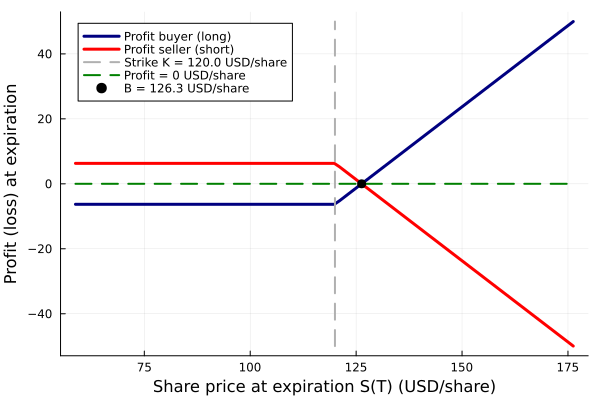

In [67]:
let
    plot(profit_array_call[:,1], profit_array_call[:,2], lw=3, c=:navyblue, label="Profit buyer (long)")
    plot!(profit_array_call[:,1], -1*profit_array_call[:,2], lw=3, c=:red, label="Profit seller (short)")
    VLINE = zeros(number_of_steps, 2)
    VLINE[:,1] .= K*ones(number_of_steps)
    VLINE[:,2] .= range(minimum(-1*profit_array_call[:,2]), stop = maximum(profit_array_call[:,2]), length = number_of_steps) |> collect;
    plot!(VLINE[:,1], VLINE[:,2], lw=2, c= :gray69, ls=:dash, label="Strike K = $(K) USD/share")
    HLINE = zeros(number_of_steps, 2)
    HLINE[:,1] .= range(minimum(profit_array_call[:,1]), stop = maximum(profit_array_call[:,1]), length = number_of_steps) |> collect;
    plot!(HLINE[:,1], HLINE[:,2], lw=2, c= :green, ls=:dash, label="Profit = 0 USD/share")
    scatter!([break_even_call], [0], c=:black, label = "B = $(break_even_call) USD/share", ms=5)
    xlabel!("Share price at expiration S(T) (USD/share)", fontsize=18)
    ylabel!("Profit (loss) at expiration", fontsize=18)
end

## Payoff and Profit Diagrams for `Put` contracts
The payoff per share of a `put` contract at expiration `T` days in the future $V_{p}(K,S(T))$ is defined as:

$$V_{p}(K,S(T)) = (K-S)^{+} = \max\left(K - S(T), 0\right)$$

where $K$ denotes the strike price and $S(T)$ represents the share price of the underlying asset `T` days in the future (at expiration). The right (but not the obligation) to sell shares at the strike `K` is not free. The contract `seller` charges the contract `buyer` a premium for each `put` contract $\mathcal{P}_{p}(\dots)$. From the perspective of the `buyer`, the profit per share for the `put` contract $P_{p}$ is the payoff of the contract minus the cost of the contract:

$$P_{p}(K,S(T)) = {V}_{p}(K,S(T)) -  \mathcal{P}_{p}(K,S(0))$$

Thus, from the buyer’s perspective, to breakeven the share price must fall _below the strike price_ to make up the amount paid for the contract which is the breaken share price $\mathcal{B}_{p}$:

$$\mathcal{B}_{p} = K - \mathcal{P}(K,S(0))$$

Finally, the premium (cost) for each `put` contract $\mathcal{P}_{p}(\dots)$ is defined by the expression:

$$\mathcal{P}_{p}(K,S(0))\geq\mathbb{E}\Bigl(\mathcal{D}^{-1}_{T,0}(\bar{r})\cdot{V_{p}}(K,S(T)\Bigr)$$

where $\mathcal{D}_{T,0}(\bar{r})$ denotes the discount rate between the time when the contract was purchased `0` and contract expiration `T` days in the future. Option contracts use risk-neutral pricing; thus, the discount rate $\bar{r}$ is typically taken as the interest rate on 10-year treasury notes. 

### Implementation
Let's consider hypothetical `put` contracts for `AMD` with a strike price of `K = 120`, and 31-days to expiration. Assume the current share price of `AMD` is `S(0) = 117.50 USD/share`, and the average implied volatility for `AMD` options contracts with `DTE = 31 days` is `IV = 51.75%`. With these parameters, the premimum for this contract is `7.85 USD/share`. Specify the premium in the `premium_put` variable:

In [54]:
premium_put = 7.85;

Next, build a `MyAmericanPutContractModel` instance which holds the parameters for the `put` contract using the `build(...)` method. We store the contract model in the `my_put_contract` variable. The contract model requires that we set the fields:

* The strike price `K`, the `premium`, the number of contracts in the `copy` field, and the `sense` field (we are `long` so `sense=1`)

In [55]:
my_put_contract = build(MyAmericanPutContractModel, (
    K = K, premium = premium_put, copy = 1, sense = 1
));

Compute the profit arrays using the `profit(...)` function. This function takes a `C` $\times$ `1` array of contracts and `N` $\times$ `1` array of $S(T)$ values and returns the `N` $\times$ `C+1` profit array, where rows correspond to values of $S(T)$, and:

* `Col 1` holds the `S(T)` values, `col 2 ... col C` holds the profit value for each contract leg, and `col C+1` holds the aggregate profit.

In [64]:
profit_array_put = profit([my_put_contract], share_price_array);

The breakeven point for a  `put` contract is the strike price minus the cost of the contract, save the breakeven value in the `break_even_put` variable:

In [71]:
break_even_put = K - premium_put;

#### Visualize

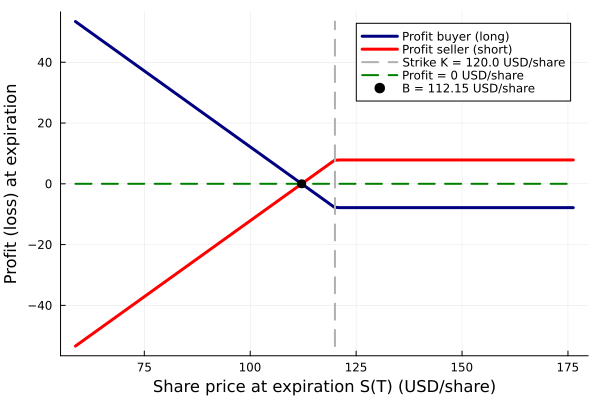

In [66]:
let
    plot(profit_array_put[:,1], profit_array_put[:,2], lw=3, c=:navyblue, label="Profit buyer (long)")
    plot!(profit_array_put[:,1], -1*profit_array_put[:,2], lw=3, c=:red, label="Profit seller (short)")
    VLINE = zeros(number_of_steps, 2)
    VLINE[:,1] .= K*ones(number_of_steps)
    VLINE[:,2] .= range(minimum(-1*profit_array_put[:,2]), stop = maximum(profit_array_put[:,2]), length = number_of_steps) |> collect;
    plot!(VLINE[:,1], VLINE[:,2], lw=2, c= :gray69, ls=:dash, label="Strike K = $(K) USD/share")
    HLINE = zeros(number_of_steps, 2)
    HLINE[:,1] .= range(minimum(profit_array_put[:,1]), stop = maximum(profit_array_put[:,1]), length = number_of_steps) |> collect;
    plot!(HLINE[:,1], HLINE[:,2], lw=2, c= :green, ls=:dash, label="Profit = 0 USD/share")
    scatter!([break_even_put], [0], c=:black, label = "B = $(break_even_put) USD/share", ms=5)
    xlabel!("Share price at expiration S(T) (USD/share)", fontsize=18)
    ylabel!("Profit (loss) at expiration", fontsize=18)
end

### Disclaimer and Risks

__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team.

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance. Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.